**Load Dataset**

First way with data in folder

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

FileNotFoundError: ignored

Second way with download data from web 

4422102/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


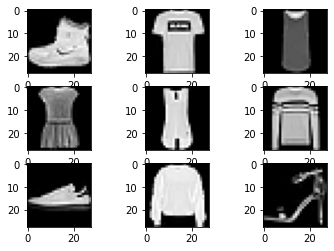

In [2]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

for i in range(9):
 pyplot.subplot(330+i+1)
 pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

**First Model of CNN**

Epoch 1/200
188/188 [==============================] - 10s 10ms/step - loss: 0.8073 - accuracy: 0.7135 - val_loss: 0.5114 - val_accuracy: 0.8123
Epoch 2/200
188/188 [==============================] - 2s 9ms/step - loss: 0.4724 - accuracy: 0.8302 - val_loss: 0.4264 - val_accuracy: 0.8502
Epoch 3/200
188/188 [==============================] - 2s 10ms/step - loss: 0.4051 - accuracy: 0.8546 - val_loss: 0.3953 - val_accuracy: 0.8622
Epoch 4/200
188/188 [==============================] - 2s 12ms/step - loss: 0.3699 - accuracy: 0.8688 - val_loss: 0.3777 - val_accuracy: 0.8662
Epoch 5/200
188/188 [==============================] - 2s 11ms/step - loss: 0.3426 - accuracy: 0.8784 - val_loss: 0.3456 - val_accuracy: 0.8778
Epoch 6/200
188/188 [==============================] - 2s 9ms/step - loss: 0.3241 - accuracy: 0.8834 - val_loss: 0.3281 - val_accuracy: 0.8832
Epoch 7/200
188/188 [==============================] - 2s 9ms/step - loss: 0.3091 - accuracy: 0.8888 - val_loss: 0.3287 - val_accuracy: 0

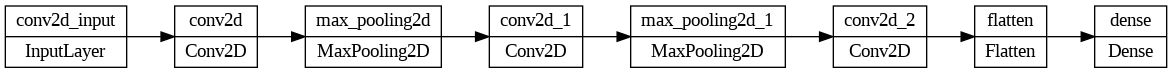

In [3]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#(n x 784) ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#one-hot encoding
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat,
          epochs=200, batch_size=256, validation_split=0.2)

from keras.utils.vis_utils import plot_model

plot_model(model,rankdir='LR')

**Plot ACC and Loss for Model 1**

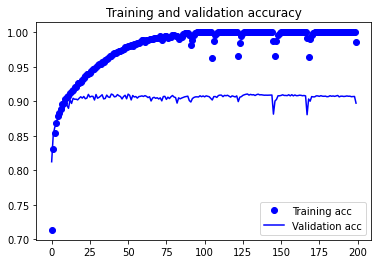

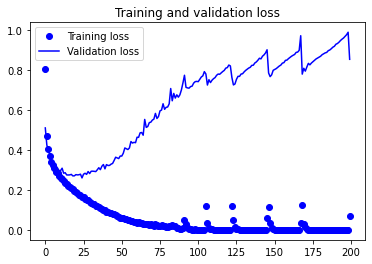

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Plot Confusion Matrix for Model 1**

313/313 [==============================] - 1s 2ms/step


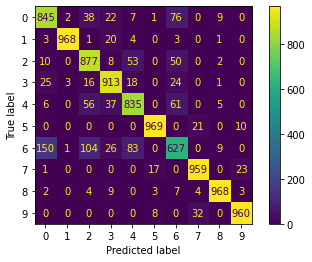

In [5]:
from sklearn import metrics

actual = y_test
predicted = np.argmax(model.predict(X_test), axis=1)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

class_names = np.array(['1', '2', '3', '4', '5','6','7','8','9','10'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

**Second Model of CNN**

Epoch 1/200
188/188 [==============================] - 2s 10ms/step - loss: 1.6943 - accuracy: 0.3576 - val_loss: 0.9674 - val_accuracy: 0.6520
Epoch 2/200
188/188 [==============================] - 2s 9ms/step - loss: 1.0389 - accuracy: 0.6069 - val_loss: 0.8654 - val_accuracy: 0.6738
Epoch 3/200
188/188 [==============================] - 2s 9ms/step - loss: 0.9347 - accuracy: 0.6529 - val_loss: 0.7721 - val_accuracy: 0.7124
Epoch 4/200
188/188 [==============================] - 2s 9ms/step - loss: 0.8648 - accuracy: 0.6771 - val_loss: 0.7185 - val_accuracy: 0.7298
Epoch 5/200
188/188 [==============================] - 2s 9ms/step - loss: 0.8223 - accuracy: 0.6957 - val_loss: 0.6828 - val_accuracy: 0.7430
Epoch 6/200
188/188 [==============================] - 1s 8ms/step - loss: 0.7874 - accuracy: 0.7078 - val_loss: 0.6560 - val_accuracy: 0.7514
Epoch 7/200
188/188 [==============================] - 2s 9ms/step - loss: 0.7616 - accuracy: 0.7164 - val_loss: 0.6575 - val_accuracy: 0.749

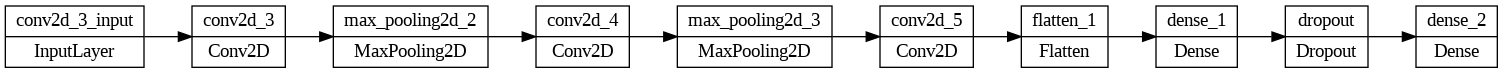

In [6]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#(n x 784) ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#one-hot encoding
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(X_train, y_train_cat,
          epochs=200, batch_size=256, validation_split=0.2)

from keras.utils.vis_utils import plot_model

plot_model(model,rankdir='LR')

**Plot ACC and Loss for Model 2**

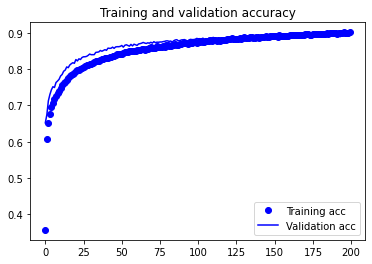

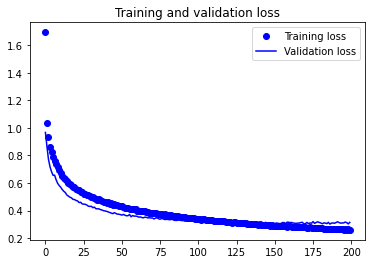

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Plot Confusion Matrix for Model 2**

313/313 [==============================] - 1s 2ms/step


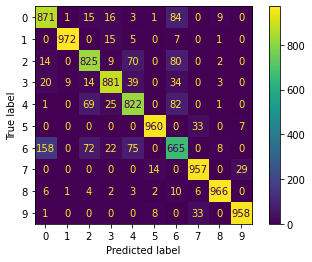

In [8]:
from sklearn import metrics

actual = y_test

predicted = np.argmax(model.predict(X_test), axis=1)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

class_names = np.array(['1', '2', '3', '4', '5','6','7','8','9','10'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix) 

cm_display.plot()
plt.show()